### Try out different regularization and optimization techniques and vary the corresponding hyperparameters
- Hidden layers/units per layer
- L2 regularization
- Dropout
- RMSProp
- Adam
- Minibatches

### Tabulate your findings and provide a explanantion of the observations


In [2]:
import torch 
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [3]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### Defining the network

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out

#### If the following code does not work, do the following:
- open a terminal and enter
- pip install ipywidgets
- jupyter nbextension enable --py widgetsnbextension

#### If the second line shows [OK], it should work

In [5]:
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [6]:
test_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=False, 
                                           transform=transforms.ToTensor(),download=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, shuffle=True)

5


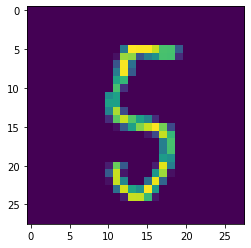

In [7]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0].item())
 
    plt.imshow(images[0].reshape((28,28)))
    break

In [8]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

### Train the model

In [10]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        

Epoch [1/5], Step [100/600], Loss: 0.5734
Epoch [1/5], Step [200/600], Loss: 0.4306
Epoch [1/5], Step [300/600], Loss: 0.2558
Epoch [1/5], Step [400/600], Loss: 0.2611
Epoch [1/5], Step [500/600], Loss: 0.2060
Epoch [1/5], Step [600/600], Loss: 0.3114
Epoch [2/5], Step [100/600], Loss: 0.2363
Epoch [2/5], Step [200/600], Loss: 0.2169
Epoch [2/5], Step [300/600], Loss: 0.1612
Epoch [2/5], Step [400/600], Loss: 0.2588
Epoch [2/5], Step [500/600], Loss: 0.2604
Epoch [2/5], Step [600/600], Loss: 0.2864
Epoch [3/5], Step [100/600], Loss: 0.1019
Epoch [3/5], Step [200/600], Loss: 0.1245
Epoch [3/5], Step [300/600], Loss: 0.2372
Epoch [3/5], Step [400/600], Loss: 0.2183
Epoch [3/5], Step [500/600], Loss: 0.1972
Epoch [3/5], Step [600/600], Loss: 0.1385
Epoch [4/5], Step [100/600], Loss: 0.1967
Epoch [4/5], Step [200/600], Loss: 0.1915
Epoch [4/5], Step [300/600], Loss: 0.1413
Epoch [4/5], Step [400/600], Loss: 0.2024
Epoch [4/5], Step [500/600], Loss: 0.1520
Epoch [4/5], Step [600/600], Loss:

Output prob. dist: tensor([[-12.7213,   7.6015,  -3.5474,   0.2179,  -4.6622,  -2.9086,  -3.8927,
          -1.8319,  -1.4311,  -1.5982]])
1


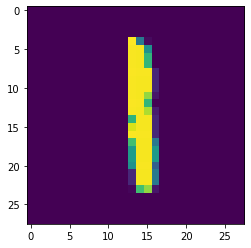

In [11]:
for i, (images, labels) in enumerate(train_loader):
        ## Taking 10th image of each batch
        image = images[44].reshape(-1, 28*28)
        label = labels[44]
        plt.imshow(image.reshape((28,28)))
        output = model(image)
        print("Output prob. dist:",(output.data))
        print(torch.max(output.data, 1)[1].item())
        
        break